In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# load packages
import pandas as pd
import statsmodels.tsa.stattools as stats
import statsmodels.graphics.tsaplots as sg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import sys
from datetime import datetime
import numpy as np

import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

sys.path.append("../pipelines")
import Pipelines as tdw
data_folder = "/projects/p20519/roller_output/optimizing_window_size/RandomForest/insilico_size10_1/"

output_path = "/home/jjw036/Roller/insilico_size10_1"

current_time = datetime.now().strftime('%Y-%m-%d_%H:%M:%S')

data_folder = "../output/insilico_size10_1"
file_path = "../data/dream4/insilico_size10_1_timeseries.tsv"
run_params = {'data_folder': data_folder,
              'file_path':file_path,
              'td_window':10,
              'min_lag':1,
              'max_lag':3,
              'n_trees':10,
              'permutation_n':10,
              'lag_method':'mean_mean',
              'calc_mse':False,
              'bootstrap_n':1000,
              'n_trials':1,
              'run_time':current_time,
              'sort_by':'rank',
              'iterating_param':'td_window',
              }
            

roc,pr, tdr = tdw.get_td_stats(**run_params)

['Time', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10']
Running permutation on window 3...
Running permutation on window 4...
Running permutation on window 5...
Running permutation on window 6...
Running permutation on window 7...
Running permutation on window 8...
Running permutation on window 9...
Running permutation on window 10...
Running permutation on window 11...
Compiling all model edges...
[DONE]
Lumping edges...
[DONE]

/Users/jjw036/Roller/Swing/Swing.py:564: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  current_df.sort(['adj_imp'], ascending=False, inplace=True)
/Users/jjw036/Roller/Swing/Swing.py:690: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  sort_df.sort(sort_field, ascending=True, inplace=True)



Calculating rank edge importance...
[DONE]
90
Scoring model...
[DONE]
0.862222222222
0.527795510071


In [3]:
## Loading baseline SWING results (uniform windowing)
edges = pd.read_csv("../data/dream4/insilico_size10_1_goldstandard.tsv",sep="\t",header=None)
edges = edges[edges[2] > 0]
edges=edges[edges.columns[0:2]]
edges = [tuple(x) for x in edges.values]

tdr.full_edge_list
#tdr.edge_dict
final_edge_list = tdr.make_sort_df(tdr.edge_dict, sort_by=run_params['sort_by'])
final_edge_list['Correct'] = final_edge_list['regulator-target'].isin(edges)
pd.set_option('display.height', 500)
final_edge_list

Calculating rank edge importance...
[DONE]
height has been deprecated.



/Users/jjw036/Roller/Swing/Swing.py:690: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  sort_df.sort(sort_field, ascending=True, inplace=True)


,regulator-target,rank_importance,Correct
0,"(G1, G5)",59.00000,True
1,"(G7, G3)",64.77778,True
2,"(G8, G6)",66.48148,True
3,"(G9, G10)",69.59259,True
4,"(G7, G2)",76.03704,False
5,"(G5, G1)",89.00000,False
6,"(G7, G4)",92.14815,True
7,"(G6, G8)",100.62963,False
8,"(G9, G3)",101.03704,False
9,"(G1, G2)",108.51852,True


In [4]:
## Identifying edges that are poorly detected
#Edge G2->G8, and G7->G4 

def get_experiment_list(filename):
    # load files
    timecourse = pd.read_csv(filename, sep="\t")
    # divide into list of dataframes
    experiments = []
    for i in range(0,85,21):
        experiments.append(timecourse.ix[i:i+20])
    
    #reformat
    for idx,exp in enumerate(experiments):
        exp = exp.set_index('Time')
        experiments[idx]=exp
    return(experiments)

experiments=get_experiment_list("../data/dream4/insilico_size10_1_timeseries.tsv")
# formatting matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


/Users/jjw036/anaconda/lib/python3.4/site-packages/pandas/tools/plotting.py:929: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


/Users/jjw036/anaconda/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


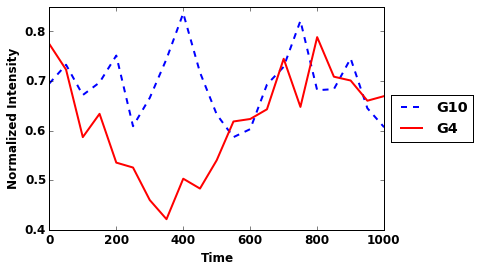

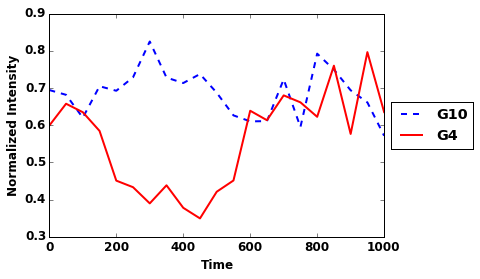

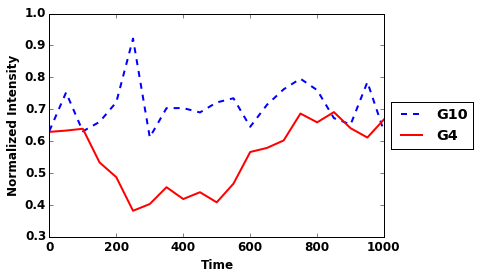

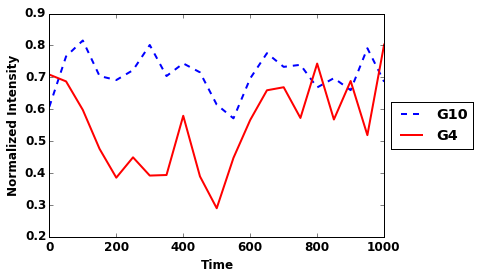

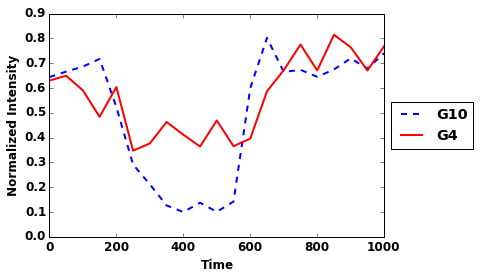

In [5]:

# plot time series for an interaction
fig = plt.figure(figsize=(8,15))

ax1 = experiments[0][['G10', 'G4']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax1.set_ylabel('Normalized Intensity', fontweight='bold')
ax1.set_xlabel('Time',fontweight='bold')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = experiments[1][['G10', 'G4']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax2.set_ylabel('Normalized Intensity', fontweight='bold')
ax2.set_xlabel('Time',fontweight='bold')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax3 = experiments[2][['G10', 'G4']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax3.set_ylabel('Normalized Intensity', fontweight='bold')
ax3.set_xlabel('Time',fontweight='bold')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax4 = experiments[3][['G10', 'G4']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax4.set_ylabel('Normalized Intensity', fontweight='bold')
ax4.set_xlabel('Time',fontweight='bold')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax5 = experiments[4][['G10', 'G4']].plot(linewidth=2, colors=['blue','red'], style=['--','-'])
ax5.set_ylabel('Normalized Intensity', fontweight='bold')
ax5.set_xlabel('Time',fontweight='bold')
ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
##